Recreate the experiment described in Section 2.3 of Sutton and Barto. The recommended
code structure is outlined in Algorithm 1. Your code should:

1. Implement an ε-greedy agent (use mean estimation and value initialization qinit) that
executes multiple, independent runs of the k-armed bandit problem described below.
2. For each k-armed bandit run, each arm a’s true value q∗(a) is sampled from the
distribution q∗(a) ∼ N (μa, σ2
a). μa and σ2
a are mean and variance, respectively.
3. For each timestep t within a run, pulling arm a yields an observed reward Rt sampled
from the distribution Rt ∼ N (q∗(a), σ), where σ is shared across all armsf.
4. Average the agent’s performance across 2000 independent runs, each with 1000 timesteps,
and generate plots describing the agent’s average reward and % time selecting the op-
timal action.
5. Hyperparameters qinit, ε, k, μa, σ2
a, and σ should be modifiable.

In [72]:
import numpy as np
#some seed that produces results that can be interpreted
np.random.seed(435)

def bandit_testing(q_init, epsilon, k, value_means, value_variance, observed_reward_variance, run_count = 2000, time_steps = 1000):
  #set the metric collection variables, finding the max of the value means and init
  #collection matrices
  optimal_value = max(value_means)
  average_reward_collection = np.zeros((run_count, time_steps))
  optimal_action_collection = np.zeros((run_count, time_steps))

  for j in range(run_count):
    #init Q_a and N_a to 0
    Q_a = np.full(k, q_init)
    N_a = np.zeros(k)

    for i in range(time_steps):
      A = 0
      # we must take random action with p(epsilon)
      if np.random.rand() < epsilon:
        A = np.random.choice(k)
      else:
        A = np.argmax(Q_a)
      #Agent variance, will get a value with unit variance
      value_with_variance = np.random.normal(loc=value_means[A],scale=value_variance[A])
      reward = np.random.normal(loc=value_with_variance, scale=observed_reward_variance)
      N_a[A] += 1
      #update action value with alpha_t(a) = 1/N_a (times selecting an arm)
      Q_a[A] = Q_a[A] + (1/N_a[A])*(reward-Q_a[A])
      average_reward_collection[j,i] += reward
      optimal_action_collection[j,i] += max(0,reward)/optimal_value
  
  average_rewards = np.mean(average_reward_collection, axis=0)
  average_optimality = np.mean(optimal_action_collection, axis=0)
  return average_rewards, average_optimality

Generate the plots under parameters specified by Section 2.3 of Sutton and Barto.
How does ε affect convergence?

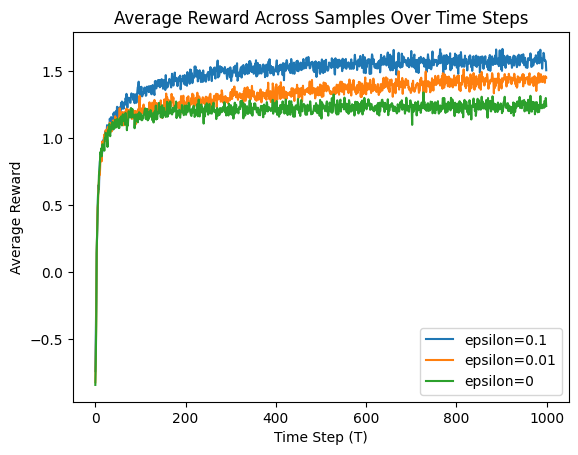

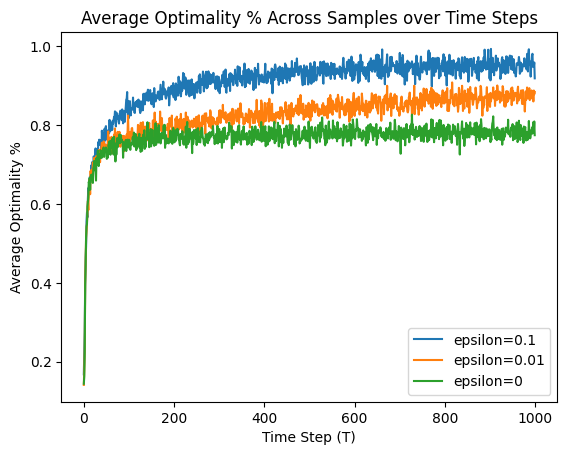

In [73]:
import matplotlib.pyplot as plt

k = 10
value_means = np.random.normal(loc=0.0, scale=1.0, size=k)
q_init = np.zeros(k)
value_variance = np.ones(k)
observed_reward_variance = 1

value_init = np.zeros(k)

obs_variance_arr = [0.1,0.01,0]
reward_res,optimality_res = [],[]
for epsilon in obs_variance_arr:
  avg_rewards,avg_optimality = bandit_testing(
    q_init, 
    epsilon, 
    k, 
    value_means, 
    value_variance, 
    observed_reward_variance)
  reward_res.append(avg_rewards)
  optimality_res.append(avg_optimality)

#plot rewards
for idx, res in enumerate(reward_res):
  plt.plot(range(1000), res,label=f'epsilon={epsilon_arr[idx]}')
plt.xlabel('Time Step (T)')
plt.ylabel('Average Reward')
plt.title('Average Reward Across Samples Over Time Steps')
plt.legend()
plt.show()

plt.clf()
#plot optimality %
for idx, res in enumerate(optimality_res):
  plt.plot(range(1000), res,label=f'epsilon={epsilon_arr[idx]}')
plt.xlabel('Time Step (T)')
plt.ylabel('Average Optimality %')
plt.title('Average Optimality % Across Samples over Time Steps')
plt.legend()
plt.show()

higher values of epsilon reach convergence faster, but lower values of epsilon converges on higher optimality over longer timesteps.

Rerun the above but increase σ^2 (observed reward Rt variance). How does convergence
change? Repeat the same when decreasing σ2 and modifying σ_a^2

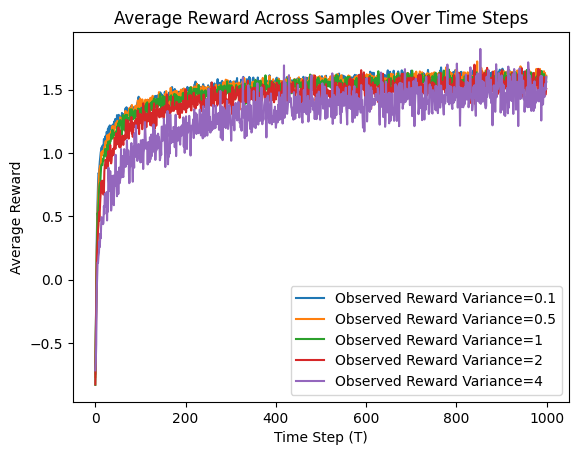

In [74]:
import matplotlib.pyplot as plt
np.random.seed(435)

k = 10
value_means = np.random.normal(loc=0.0, scale=1.0, size=k)
q_init = np.zeros(k)
value_variance = np.ones(k)
epsilon = 0.1

value_init = np.zeros(k)

observed_reward_variance = [0.1,0.5,1,2,4]
reward_res,optimality_res = [],[]
for observed_variance in observed_reward_variance:
  avg_rewards, _ = bandit_testing(q_init, epsilon, k, value_means, value_variance, observed_variance)
  reward_res.append(avg_rewards)

#plot rewards
for idx, res in enumerate(reward_res):
  plt.plot(range(1000), res,label=f'Observed Reward Variance={observed_reward_variance[idx]}')
plt.xlabel('Time Step (T)')
plt.ylabel('Average Reward')
plt.title('Average Reward Across Samples Over Time Steps')
plt.legend()
plt.show()

It appears as observed reward variance increases, the noise from this change weakens convergence. Even if a bandit has an optimal arm that it samples, higher variance reduces the consistency of that arm.

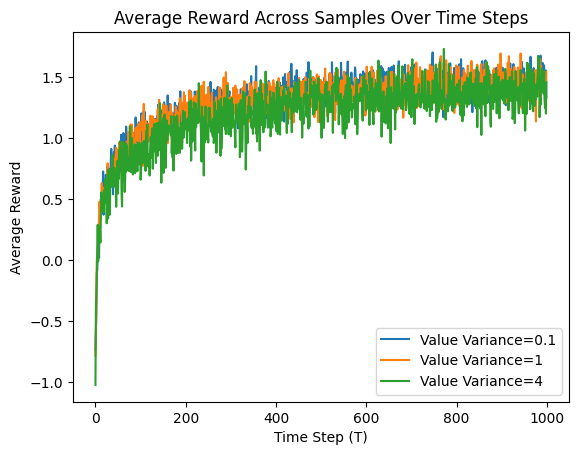

In [75]:
import matplotlib.pyplot as plt
np.random.seed(435)

k = 10
value_means = np.random.normal(loc=0.0, scale=1.0, size=k)
q_init = np.zeros(k)
epsilon = 0.1

value_init = np.zeros(k)

value_variance_nums = [0.1,1,4]
value_variance_arr =[]
for num in value_variance_nums:
  value_variance_arr.append(np.full(k, num))

reward_res,optimality_res = [],[]
for value_variance in value_variance_arr:
  avg_rewards, _ = bandit_testing(q_init, epsilon, k, value_means, value_variance, observed_variance)
  reward_res.append(avg_rewards)

#plot rewards
for idx, res in enumerate(reward_res):
  plt.plot(range(1000), res,label=f'Value Variance={value_variance_nums[idx]}')
plt.xlabel('Time Step (T)')
plt.ylabel('Average Reward')
plt.title('Average Reward Across Samples Over Time Steps')
plt.legend()
plt.show()

when changing value variance, it appears to have the same effect of modififying the observed reward variance. More generally, higher variance will result in more noise/fluctuation in the reward, resulting in a weaker convergence on the optimal average reward

Modify the arm count k. Is there a relationship between convergence, ε, and k?

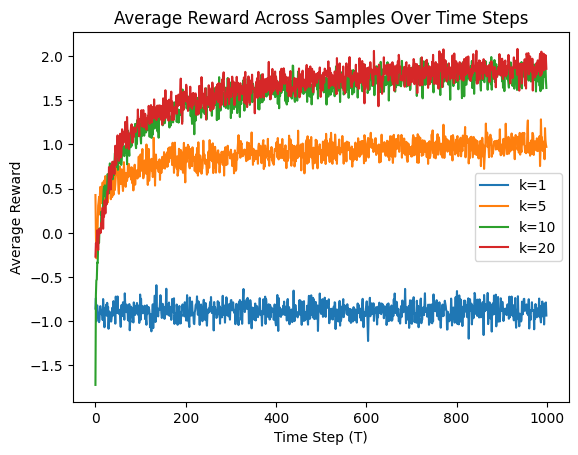

In [79]:
import matplotlib.pyplot as plt
np.random.seed(435)

epsilon = 0.1
k_values = [1,5,10,20]

reward_res,optimality_res = [],[]
for k in k_values:
  value_init = np.zeros(k)
  value_means = np.random.normal(loc=0.0, scale=1.0, size=k)
  value_variance = np.ones(k)
  q_init = np.zeros(k)
  avg_rewards, _ = bandit_testing(q_init, epsilon, k, value_means, value_variance, observed_variance)
  reward_res.append(avg_rewards)

#plot rewards
for idx, res in enumerate(reward_res):
  plt.plot(range(1000), res,label=f'k={k_values[idx]}')
plt.xlabel('Time Step (T)')
plt.ylabel('Average Reward')
plt.title('Average Reward Across Samples Over Time Steps')
plt.legend()
plt.show()

When considering varying values of # of arms and epsilon, they appear to both affect convergence similiarly. For very low values (k=1, or epsilon=0), options are limited and convergence occurs at sub-optimal values, increasing both will allow for better exploration/exploitation. For k specifically, it appears higher values results in more optimal rewards with similiar convergence for all values of k that are higher. This differs from epsilon where lower values (not 0), will converge slower, but on more optimal average rewards over more time steps.

Modify the ε-greedy agent’s value initialization qinit. How does initialization affect
convergence for varying ε? How do we modify qinit such that the agent’s performance
with ε = 0 gets close to optimal?

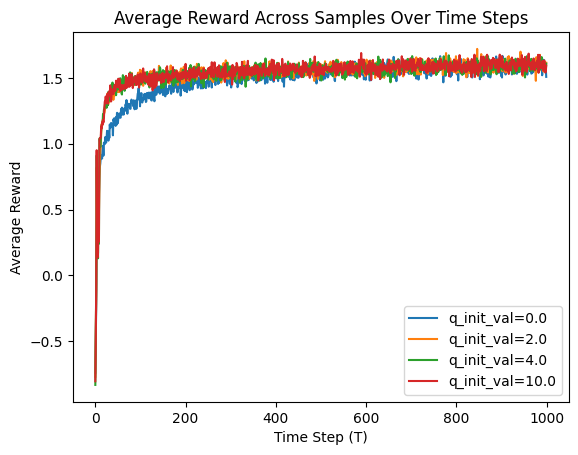

In [89]:
import matplotlib.pyplot as plt
np.random.seed(435)

k = 10
value_means = np.random.normal(loc=0.0, scale=1.0, size=k)
value_variance = value_variance = np.ones(k)
observed_variance = 1.0
epsilon = 0.1
value_init = np.zeros(k)

q_init_nums = [0.,2.,4.,10.]
reward_res,optimality_res = [],[]
for num in q_init_nums:
  q_init = np.full(k,num)
  avg_rewards, _ = bandit_testing(q_init, epsilon, k, value_means, value_variance, observed_variance)
  reward_res.append(avg_rewards)

#plot rewards
for idx, res in enumerate(reward_res):
  plt.plot(range(1000), res,label=f'q_init_val={q_init_nums[idx]}')
plt.xlabel('Time Step (T)')
plt.ylabel('Average Reward')
plt.title('Average Reward Across Samples Over Time Steps')
plt.legend()
plt.show()

If we set our q_init to be "greedy", or of higher initial values, it encourages the explotation of other options. So in the case when epsilon=0, setting a value higher than the mean and variance by some significant amount, we can encourage the explotiation of other arms when the true value set for a given arm will likely be lower than the optimistic value initially set. So if we have:

q_init = [3,3,3,3,3] with e=0, the bandit will choose the max. Once chosen, the q values will look something like:

q = [0.5,3,3,3,3]. So with no exploration, the bandit will be encouraged to choose another arm, where values are much higher than the observed reward thus far.

Problem 3: Reflection
These questions do not have one right answer. They are meant to encourage you to think
about the ”bigger RL picture” now that we have more pieces to connect. Think about your
answer, establish the mathematical justification, and imagine their implications in more
complex RL contexts.
1. How does the choice of epsilon affect performance, convergence, and optimality?
  As epsilon increases, the optimality is reached faster, but perhaps not as optimal with lower, but not e=0, values. Lower values of epsilon approach optimality slower, but at higher values over longer time steps. Convergence to q_*(a) appears to not be possible with e=0, since exploration is not encouraged, meaning only the greedy value will be chosen at each time step.
2. Should we ever stop exploring? Why or why not?
  It depends. If the solution requires Q_t(a) to roughly equal Q_*(a), then no. However, after a certain number of timesteps, the convergence of Q_t(a) to Q_*(a) will be met due to law of large numbers for values of e > 0, assuming stationality. If some threshold of sub-optimality can be determined, exploration should stop once within an acceptance threshold. In expirements conducted, it shows around timestep 400 the gain achieved from higher exploration (where epsilon is higher) tends to have diminishing returns. So, exploration could be decreased in relation to the increase of average reward over time.
3. How do environment dynamics (ex: stochasticity, non-stationarity, etc.) affect explo-
ration or the need to do so?
  Exploration would need to be increased to reflect potential changes in the environment. Say an agent found an arm that produced the highest average reward, other arms in a non-stationary environment may become more advantageous to exploit in future timesteps. Understanding these changes would require more exploration of the environment.
4. What challenges would sequentiality add to the exploration-exploitation problem?
  Sequentiality would require understanding of the relation between the state of the arms and how the actions change that state. Say a certain arm changes the subsequent values to either be better or worse, exploitation would be more difficult as just picking the max value may not suffice. Or in the case a certain combination of actions generate better rewards, exploration-exploitation alone may not be able to take advantage of combinations that converge to Q_*(a)